In [2]:
import pandas as pd
%matplotlib inline

import sys
sys.path.insert(1, '../../scripts/')
from s3_support import *

In [3]:
list_files("qgiv-stats-data")

form_paths.csv (1MB)
integrations_org_download.clean.csv (0MB)
logs.csv (376MB)
organizations.clean.csv (1MB)
organizations.csv (1MB)
orgs.csv (1MB)
--------------------------------------------------
Bucket qgiv-stats-data contains 6 files (0.4GB)


In [4]:
logs = get_dataframe_from_file("qgiv-stats-data", "logs.csv")

/home/ubuntu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2901: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [11]:
logs['systemId'] = logs['systemId'].fillna(0).astype('int')
logs['systemType'] = logs['systemType'].fillna(0).astype('int')
logs['org'] = logs['org'].fillna(0).astype('int')

In [12]:
logs[['created', 'systemId', 'systemType', 'type', 'org']].head()

,created,systemId,systemType,type,org
0,2019-05-01 21:11:32,174838,25,3,441530
1,2019-05-01 21:11:32,6393269,27,3,441530
2,2019-05-01 21:10:05,6393267,27,3,443692
3,2019-05-01 21:09:21,6393266,27,3,427080
4,2019-05-01 21:08:38,1295717,44,3,0


In [48]:
logs['systemType'].value_counts()

27    755259
25    401206
13    365403
44    306646
28    268088
12    217110
23     90309
24     88158
11     50091
21     49527
34     48531
36     27426
29     24363
35     19472
32     15452
41      5780
39      5643
40      5625
18      4735
4       3462
0       2675
42      1076
15      1058
43       614
8        368
20       348
38       329
46        72
26        38
Name: systemType, dtype: int64

In [46]:
ex_org = 14268
ex_logs = logs[logs['org']==ex_org].copy()
ex_logs['created'] = pd.to_datetime(ex_logs['created'])

start_date = ex_logs['created'].min()
end_date = ex_logs['created'].max()
len_logs = len(ex_logs)

print("{} logs from {} to {}".format(len_logs, start_date, end_date))

78520 logs from 2014-06-04 12:03:11 to 2019-10-27 19:16:03


In [47]:
ex_logs['systemType'].value_counts()

27    34682
13    18080
12    10024
28     7823
25     7275
24      216
23      155
21       83
34       66
32       64
44       16
29       13
18       12
4        10
35        1
Name: systemType, dtype: int64

In [26]:
ex_logs['monthyear'] = ex_logs['created'].dt.to_period("M")

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


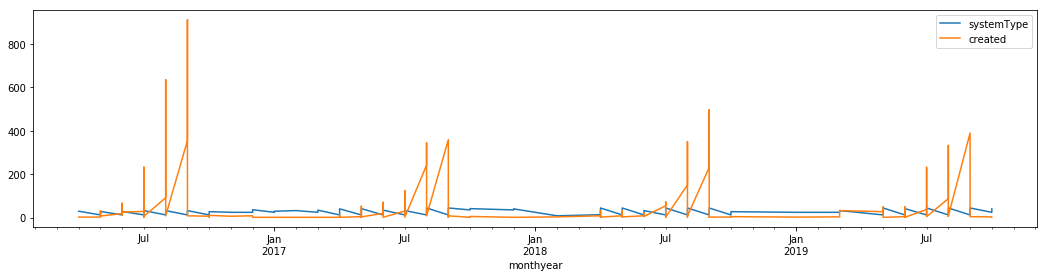

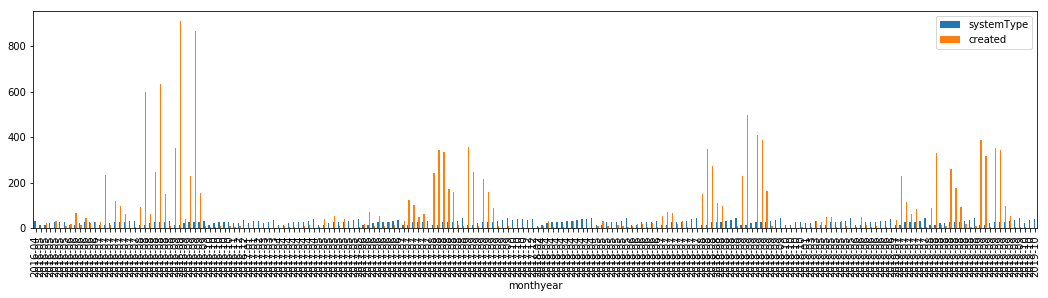

In [39]:
print(ex_logs.groupby(['monthyear', 'systemType'])['created'].count().reset_index().plot(x='monthyear', figsize=(18,4)))
print(ex_logs.groupby(['monthyear', 'systemType'])['created'].count().reset_index().plot(kind='bar', x='monthyear', figsize=(18,4)))

In [42]:
ex_logs.groupby(['monthyear', 'systemType'])['created'].count().reset_index()

,monthyear,systemType,created
0,2016-04,29,2
1,2016-05,12,2
2,2016-05,13,22
3,2016-05,24,2
4,2016-05,25,30
5,2016-05,27,2
6,2016-05,28,7
7,2016-06,12,18
8,2016-06,13,66
9,2016-06,24,12
